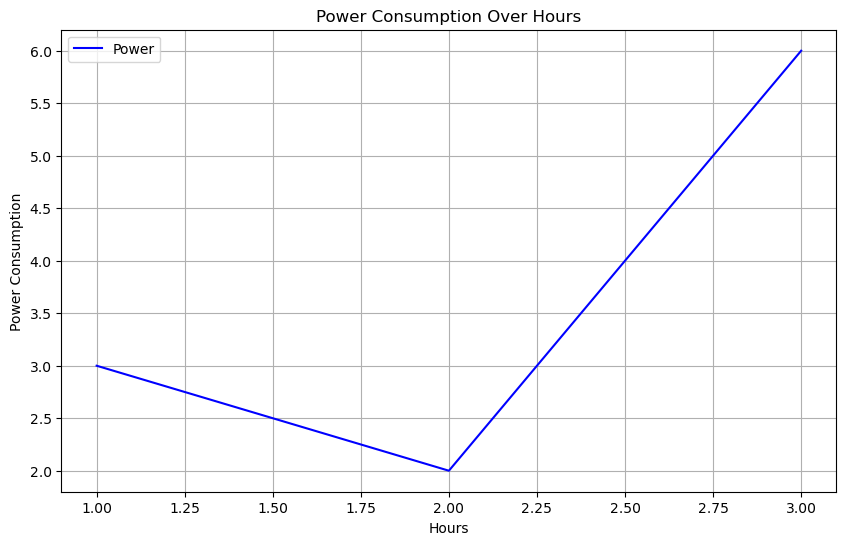

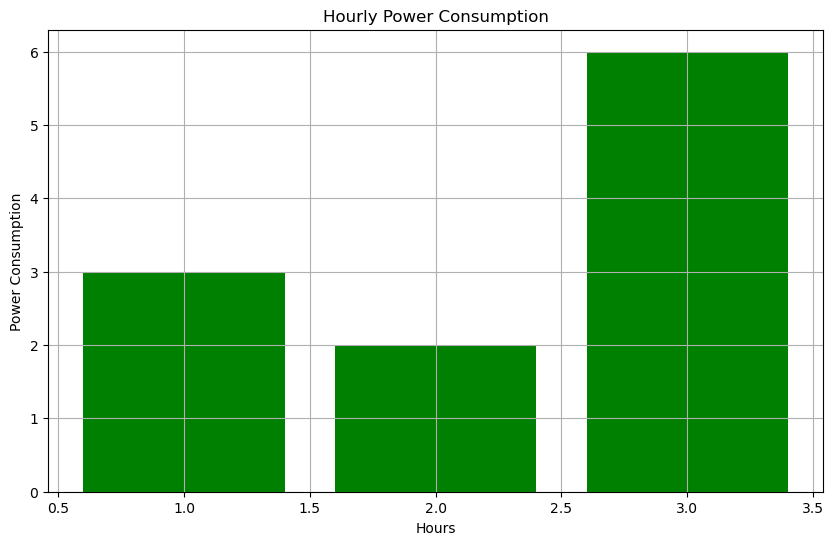

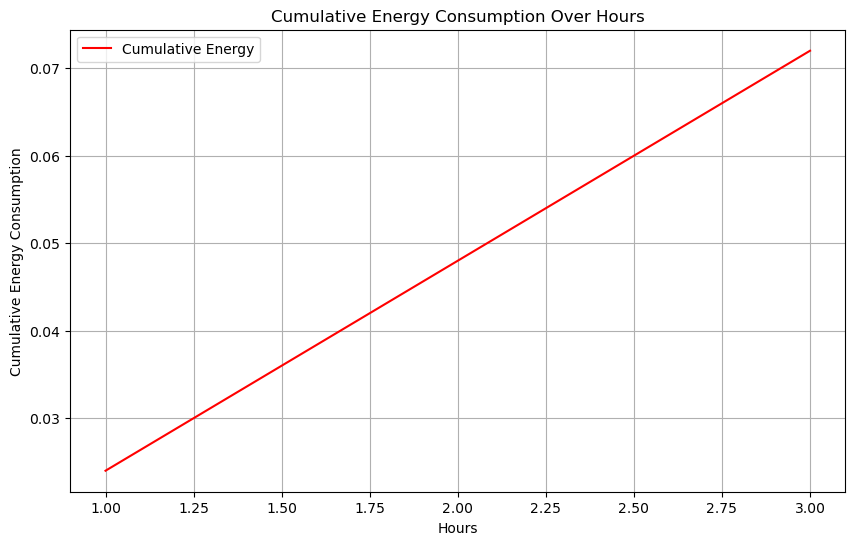

 Hours  Voltage  Current  Power  Energy
     1      139   0.0271      3   0.024
     2      140   0.0183      2   0.024
     3      142   0.0446      6   0.024


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load pin values from the saved JSON file
with open('pin_values.json', 'r') as f:
    pin_values_dict = json.load(f)

# Convert dictionary to DataFrame
pin_values_df = pd.DataFrame(pin_values_dict)

# Reset index and set the new index to start from 1
pin_values_df = pin_values_df.reset_index(drop=True)
pin_values_df.index += 1

# Rename columns
pin_values_df = pin_values_df.rename(columns={
    "V0": "Voltage",
    "V1": "Current",
    "V2": "Power",
    "V3": "Energy"
})

# Add a new "Hours" column
pin_values_df.insert(0, "Hours", pin_values_df.index)

# Plot power consumed (line graph)
plt.figure(figsize=(10, 6))
plt.plot(pin_values_df['Hours'], pin_values_df['Power'], label='Power', color='blue')
plt.xlabel('Hours')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Hours')
plt.legend()
plt.grid(True)
plt.show()

# Plot hourly power consumption (bar graph)
plt.figure(figsize=(10, 6))
plt.bar(pin_values_df['Hours'], pin_values_df['Power'], color='green')
plt.xlabel('Hours')
plt.ylabel('Power Consumption')
plt.title('Hourly Power Consumption')
plt.grid(True)
plt.show()

# Calculate cumulative energy consumption
cumulative_energy = pin_values_df['Energy'].cumsum()

# Plot cumulative energy consumption (line graph)
plt.figure(figsize=(10, 6))
plt.plot(pin_values_df['Hours'], cumulative_energy, label='Cumulative Energy', color='red')
plt.xlabel('Hours')
plt.ylabel('Cumulative Energy Consumption')
plt.title('Cumulative Energy Consumption Over Hours')
plt.legend()
plt.grid(True)
plt.show()

# Display DataFrame as a table
print(pin_values_df.to_string(index=False, header=True))
